# 数据处理&特征工程

## 导入相关的库

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 导入|初探索 数据

In [97]:
data = pd.read_csv("weather.csv",index_col=0)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [98]:
# 探索数据维度
data.shape

(142193, 22)

In [4]:
# 抽样探索
data_1 = data.sample(5000,random_state=0)
# 索引刷新重置
data_1.index=range(data_1.shape[0])
# 抽样数据集维度
print("维度：",data_1.shape)
data_1.head().T

维度： (5000, 22)


,0,1,2,3,4
Date,2012-10-09,2011-05-24,2009-08-06,2009-03-06,2010-07-02
Location,Cairns,Bendigo,Walpole,Perth,AliceSprings
MinTemp,17.4,6.8,10.1,14.4,6.8
MaxTemp,29,14.4,15.4,33.4,14.3
Rainfall,0,0.8,14.6,0,10
Evaporation,3.6,0.8,NaN,8,0.2
Sunshine,11.1,NaN,NaN,11.6,7.3
WindGustDir,NNE,S,WSW,SW,E
WindGustSpeed,33,46,31,41,28
WindDir9am,SE,SW,SW,ESE,ENE


In [5]:
#查看所有特征名
sorted(list(data_1.columns))

['Cloud3pm',
 'Cloud9am',
 'Date',
 'Evaporation',
 'Humidity3pm',
 'Humidity9am',
 'Location',
 'MaxTemp',
 'MinTemp',
 'Pressure3pm',
 'Pressure9am',
 'RainTomorrow',
 'Rainfall',
 'Sunshine',
 'Temp3pm',
 'Temp9am',
 'WindDir3pm',
 'WindDir9am',
 'WindGustDir',
 'WindGustSpeed',
 'WindSpeed3pm',
 'WindSpeed9am']

In [6]:
# 查看日期数据是否有重复值
data_1.Date.value_counts().head(10)

2009-08-23    9
2015-11-06    7
2015-08-20    7
2009-07-02    7
2013-07-06    7
2014-01-04    6
2015-10-26    6
2013-05-03    6
2015-10-10    6
2017-05-29    6
Name: Date, dtype: int64

In [7]:
# 查看下雨数据是否有重复值
data_1.Rainfall.value_counts().head(10)

0.0    3167
0.2     309
0.4     124
1.0      81
0.6      79
0.8      67
1.4      65
1.2      54
1.8      44
1.6      37
Name: Rainfall, dtype: int64

In [8]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
Date             5000 non-null object
Location         5000 non-null object
MinTemp          4968 non-null float64
MaxTemp          4986 non-null float64
Rainfall         4937 non-null float64
Evaporation      2813 non-null float64
Sunshine         2592 non-null float64
WindGustDir      4640 non-null object
WindGustSpeed    4642 non-null float64
WindDir9am       4650 non-null object
WindDir3pm       4854 non-null object
WindSpeed9am     4951 non-null float64
WindSpeed3pm     4896 non-null float64
Humidity9am      4947 non-null float64
Humidity3pm      4869 non-null float64
Pressure9am      4459 non-null float64
Pressure3pm      4458 non-null float64
Cloud9am         3123 non-null float64
Cloud3pm         2989 non-null float64
Temp9am          4974 non-null float64
Temp3pm          4895 non-null float64
RainTomorrow     5000 non-null object
dtypes: float64(16), object(6)
memory usa

## 分离|探索 特征矩阵和标签矩阵

In [9]:
X = data_1.iloc[:,:-1]
Y = data_1.iloc[:,-1]

In [10]:
X.head()
Y.head()

0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

In [11]:
print(X.shape,Y.shape)

(5000, 21) (5000,)


In [12]:
# 查看标签的种类
np.unique(Y)

array(['No', 'Yes'], dtype=object)

In [13]:
# 查看缺失比例
#Y.isnull().mean()
X.isnull().mean()

Date             0.0000
Location         0.0000
MinTemp          0.0064
MaxTemp          0.0028
Rainfall         0.0126
Evaporation      0.4374
Sunshine         0.4816
WindGustDir      0.0720
WindGustSpeed    0.0716
WindDir9am       0.0700
WindDir3pm       0.0292
WindSpeed9am     0.0098
WindSpeed3pm     0.0208
Humidity9am      0.0106
Humidity3pm      0.0262
Pressure9am      0.1082
Pressure3pm      0.1084
Cloud9am         0.3754
Cloud3pm         0.4022
Temp9am          0.0052
Temp3pm          0.0210
dtype: float64

## 训练集测试集的划分
处理数据前先划分

In [14]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size=0.3,random_state=20)

In [15]:
#查看拆分数据集的维度
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((3500, 21), (3500,), (1500, 21), (1500,))

In [16]:
#将拆分的数据集刷新重设索引
datain = [X_train,X_test,Y_train,Y_test]
for i in datain:
    i.index = range(i.shape[0])

In [17]:
#检查标签有无不均衡问题
Y_train.value_counts() 

No     2696
Yes     804
Name: RainTomorrow, dtype: int64

In [18]:
Y_test.value_counts() 

No     1151
Yes     349
Name: RainTomorrow, dtype: int64

## 标签进行编码
训练标签和测试标签要同步

In [19]:
from sklearn.preprocessing import LabelEncoder #标签专用包

In [20]:
encoder = LabelEncoder().fit(Y_train)
encoder.classes_

array(['No', 'Yes'], dtype=object)

In [21]:
Y_train_ = pd.DataFrame(encoder.transform(Y_train))

In [22]:
Y_test_ = pd.DataFrame(encoder.transform(Y_test))

## 处理特征矩阵
训练特征和测试特征要同步

### 训练特征

In [23]:
#查看特征矩阵的描述性
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,3479.0,12.285686,6.447958,-6.9,7.7,12.1,16.80,29.1
MaxTemp,3490.0,23.242407,7.073399,-4.1,18.1,22.7,28.30,44.4
Rainfall,3459.0,2.197254,7.205255,0.0,0.0,0.0,0.80,164.2
Evaporation,1958.0,5.424872,4.064430,0.0,2.6,4.8,7.35,58.5
Sunshine,1801.0,7.736535,3.707195,0.0,5.1,8.6,10.60,14.3
WindGustSpeed,3243.0,39.816220,13.602882,9.0,31.0,39.0,48.00,115.0
WindSpeed9am,3461.0,13.882115,8.893914,0.0,7.0,13.0,19.00,72.0
WindSpeed3pm,3426.0,18.729130,8.998631,0.0,13.0,19.0,24.00,78.0
Humidity9am,3460.0,68.893064,19.074968,5.0,57.0,70.0,83.00,100.0
Humidity3pm,3400.0,51.674706,20.855731,3.0,36.0,52.0,65.25,100.0


In [24]:
X_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2011-12-02,PerthAirport,17.4,34.3,0.0,10.8,13.1,E,69.0,ENE,...,35.0,26.0,24.0,13.0,1014.6,1011.3,1.0,1.0,26.8,33.2
1,2016-08-06,Tuggeranong,0.3,12.0,0.0,NaN,NaN,N,22.0,W,...,2.0,11.0,90.0,51.0,1029.9,1026.8,NaN,NaN,5.3,10.8
2,2010-04-11,Williamtown,13.6,29.0,0.0,4.8,5.5,W,70.0,NW,...,13.0,39.0,68.0,38.0,1010.0,1006.5,7.0,6.0,21.5,27.3
3,2015-06-13,Nhil,6.4,18.6,0.0,NaN,NaN,N,26.0,ENE,...,13.0,11.0,99.0,51.0,1028.9,1025.6,NaN,NaN,8.2,17.2
4,2015-03-08,PerthAirport,17.9,32.2,0.0,10.8,11.7,E,57.0,ENE,...,28.0,30.0,41.0,27.0,1018.2,1015.1,0.0,1.0,24.3,31.5


In [25]:
#查看所有数值型的特征
col = sorted(X_train.mean().index)
col,len(col)

(['Cloud3pm',
  'Cloud9am',
  'Evaporation',
  'Humidity3pm',
  'Humidity9am',
  'MaxTemp',
  'MinTemp',
  'Pressure3pm',
  'Pressure9am',
  'Rainfall',
  'Sunshine',
  'Temp3pm',
  'Temp9am',
  'WindGustSpeed',
  'WindSpeed3pm',
  'WindSpeed9am'],
 16)

In [26]:
#查看每列的均值
X_train.mean()

MinTemp            12.285686
MaxTemp            23.242407
Rainfall            2.197254
Evaporation         5.424872
Sunshine            7.736535
WindGustSpeed      39.816220
WindSpeed9am       13.882115
WindSpeed3pm       18.729130
Humidity9am        68.893064
Humidity3pm        51.674706
Pressure9am      1017.577049
Pressure3pm      1015.148784
Cloud9am            4.439024
Cloud3pm            4.479347
Temp9am            17.049411
Temp3pm            21.654195
dtype: float64

In [27]:
# 查看数值型异常值比例，3倍标准差外的数据 广播运算
(np.abs((X_train.loc[:,col] - X_train.mean())/X_train.std())>3).sum()/X_train.shape[0]

Cloud3pm         0.000000
Cloud9am         0.000000
Evaporation      0.004857
Humidity3pm      0.000000
Humidity9am      0.003143
MaxTemp          0.002857
MinTemp          0.000000
Pressure3pm      0.002286
Pressure9am      0.002286
Rainfall         0.020286
Sunshine         0.000000
Temp3pm          0.003143
Temp9am          0.000857
WindGustSpeed    0.010000
WindSpeed3pm     0.006857
WindSpeed9am     0.008857
dtype: float64

In [28]:
# 异常值的处理 此处用删除
deltrain = [] 
for i in col:
    bool_ = np.abs((X_train.loc[:,i] -X_train.loc[:,i].mean())/X_train.loc[:,i].std())>3
    ind = X_train[bool_].index
    deltrain.extend(list(ind))

In [30]:
# 去除重复的行索引
deltrain1 = list(set(deltrain))

### 测试特征
各列异常值（注意这里的均值和方差需要用训练集的）

In [33]:
(np.abs((X_test.loc[:,col] - X_train.mean())/X_train.std())>3).sum()/X_test.shape[0]

Cloud3pm         0.000000
Cloud9am         0.000000
Evaporation      0.004667
Humidity3pm      0.000000
Humidity9am      0.003333
MaxTemp          0.002000
MinTemp          0.000000
Pressure3pm      0.005333
Pressure9am      0.006667
Rainfall         0.020667
Sunshine         0.000000
Temp3pm          0.002667
Temp9am          0.000667
WindGustSpeed    0.014667
WindSpeed3pm     0.008000
WindSpeed9am     0.009333
dtype: float64

In [34]:
#提取出测试集的所有异常值的索引
deltest = []
for i in col:
    bool_ = np.abs((X_test.loc[:,i] - X_train.loc[:,i].mean())/X_train.loc[:,i].std())>3
    ind = X_test[bool_].index
    deltest.extend(list(ind))

In [36]:
#去重之后有异常值的行索引
deltest1 = list(set(deltest))

## 删除异常值
（特征和标签都要删除）

In [37]:
X_train = X_train.drop(index=deltrain1)
Y_train = Y_train_.drop(index=deltrain1)
X_test = X_test.drop(index=deltest1)
Y_test = Y_test_.drop(index=deltest1)

In [38]:
#进行任何行删除之后，千万记得要恢复索引
for i in [X_train, X_test, Y_train_, Y_test_]:
    i.index = range(i.shape[0])

## 日期特征的处理

In [39]:
#查看重复值
X_train.duplicated().sum() 
# 删除重复值用.drop_duplicates()

0

In [40]:
#查看日期的种类方法一
X_train.Date.value_counts().count()

2046

In [41]:
X_train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2011-12-02,PerthAirport,17.4,34.3,0.0,10.8,13.1,E,69.0,ENE,...,35.0,26.0,24.0,13.0,1014.6,1011.3,1.0,1.0,26.8,33.2
1,2016-08-06,Tuggeranong,0.3,12.0,0.0,NaN,NaN,N,22.0,W,...,2.0,11.0,90.0,51.0,1029.9,1026.8,NaN,NaN,5.3,10.8
2,2010-04-11,Williamtown,13.6,29.0,0.0,4.8,5.5,W,70.0,NW,...,13.0,39.0,68.0,38.0,1010.0,1006.5,7.0,6.0,21.5,27.3
3,2015-06-13,Nhil,6.4,18.6,0.0,NaN,NaN,N,26.0,ENE,...,13.0,11.0,99.0,51.0,1028.9,1025.6,NaN,NaN,8.2,17.2
4,2015-03-08,PerthAirport,17.9,32.2,0.0,10.8,11.7,E,57.0,ENE,...,28.0,30.0,41.0,27.0,1018.2,1015.1,0.0,1.0,24.3,31.5
5,2013-06-09,Launceston,4.6,15.1,2.6,NaN,NaN,NNW,30.0,NNW,...,6.0,13.0,97.0,78.0,1023.4,1021.0,NaN,NaN,11.9,13.8
6,2011-05-13,PerthAirport,11.4,23.3,0.0,6.0,9.6,ENE,50.0,ENE,...,33.0,28.0,53.0,28.0,1026.7,1022.6,1.0,2.0,15.0,22.8
7,2015-07-27,Brisbane,13.5,22.9,0.0,3.6,9.2,W,24.0,WNW,...,11.0,11.0,53.0,35.0,1024.6,1021.6,1.0,5.0,18.2,21.9
8,2017-01-03,Woomera,17.4,32.4,0.0,NaN,NaN,SSE,44.0,SE,...,28.0,19.0,50.0,20.0,1015.8,1011.8,NaN,NaN,22.1,30.1
9,2012-09-28,Richmond,13.2,33.7,0.0,NaN,NaN,NW,63.0,NW,...,30.0,28.0,29.0,27.0,1009.0,1003.9,NaN,NaN,28.8,31.5


In [42]:
#查看日期的种类方法二
len(set(X_train.Date))

2046

In [43]:
X_train.Rainfall.value_counts().head()

0.0    2153
0.2     201
0.4      87
0.8      55
1.0      52
Name: Rainfall, dtype: int64

In [44]:
#查看Rainfall列是否存在缺失值
X_train.Rainfall.isnull().sum() 

39

## 对下雨量变量进行处理

In [45]:
#对下雨量变量进行处理
X_train.loc[X_train["Rainfall"] >= 1,"RainToday"] = "Yes"
X_train.loc[X_train["Rainfall"] < 1,"RainToday"] = "No"
X_train.loc[X_train["Rainfall"] == np.nan,"RainToday"] = np.nan

In [46]:
X_test.loc[X_test["Rainfall"] >= 1,"RainToday"] = "Yes"
X_test.loc[X_test["Rainfall"] < 1,"RainToday"] = "No"
X_test.loc[X_test["Rainfall"] == np.nan,"RainToday"] = np.nan

In [47]:
X_train['RainToday'].value_counts()

No     2551
Yes     727
Name: RainToday, dtype: int64

In [48]:
#提取月份 #apply指的是循环
X_train["Date"] = X_train["Date"].apply(lambda x:int(x.split("-")[1]))
X_train.rename(columns={"Date":"Month"},inplace=True)

In [49]:
X_test["Date"] = X_test["Date"].apply(lambda x:int(x.split("-")[1]))
X_test = X_test.rename(columns={"Date":"Month"})

## 分类型变量的缺失值处理

In [50]:
#查看缺失值的缺失情况
X_train.isnull().mean() 

Month            0.000000
Location         0.000000
MinTemp          0.006331
MaxTemp          0.003015
Rainfall         0.011758
Evaporation      0.443172
Sunshine         0.487187
WindGustDir      0.073259
WindGustSpeed    0.072656
WindDir9am       0.074163
WindDir3pm       0.028942
WindSpeed9am     0.010853
WindSpeed3pm     0.021103
Humidity9am      0.010853
Humidity3pm      0.028339
Pressure9am      0.107326
Pressure3pm      0.107627
Cloud9am         0.381972
Cloud3pm         0.407597
Temp9am          0.005125
Temp3pm          0.022611
RainToday        0.011758
dtype: float64

In [51]:
X_train.dtypes #提取每一列的数据类型

Month              int64
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object

In [52]:
#找出分类型变量的特征名
cate = X_train.columns[X_train.dtypes =='object'].tolist()
cate

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [53]:
#除了特征类型为"object"的特征们，还有虽然用数字表示，但是本质为分类型特征的云层遮蔽程度
cloud = ["Cloud9am","Cloud3pm"]

In [54]:
cate = cate + cloud
cate

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'Cloud9am',
 'Cloud3pm']

In [55]:
#对于分类型特征，我们使用众数来进行填补
from sklearn.impute import SimpleImputer

In [56]:
si = SimpleImputer(missing_values=np.nan,strategy="most_frequent") #实例化模型

In [57]:
#X_test

In [58]:
si = si.fit(X_train.loc[:,cate]) #这里本质上是生成了每一列的众数
#然后我们用训练集中的众数来同时填补训练集和测试集
X_train.loc[:,cate] = si.transform(X_train.loc[:,cate])
X_test.loc[:,cate] = si.transform(X_test.loc[:,cate]) 

In [59]:
#确认训练集中是否还有缺失值
X_train.loc[:,cate].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
Cloud9am       0
Cloud3pm       0
dtype: int64

In [60]:
#确认测试集中是否还有缺失值
X_test.loc[:,cate].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
Cloud9am       0
Cloud3pm       0
dtype: int64

## 将分类变量进行编码处理

In [61]:
#将分类变量进行编码处理
from sklearn.preprocessing import OrdinalEncoder #特征专用编码包（输入必须为二维及以上）
oe = OrdinalEncoder() #实例化

In [62]:
#利用训练集进行fit
oe = oe.fit(X_train.loc[:,cate]) #相当于把每一列编码，并记录对应关系
X_train.loc[:,cate] = oe.transform(X_train.loc[:,cate])
X_test.loc[:,cate] = oe.transform(X_test.loc[:,cate])

In [63]:
cate

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'Cloud9am',
 'Cloud3pm']

## 连续型变量

In [64]:
#提取连续型特征的名字
coln = X_train.columns.tolist() 
coln 

['Month',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [65]:
#去掉已经处理过的特征
for i in cate:
    coln.remove(i)

In [66]:
coln

['Month',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [67]:
#实例化模型，填补策略为"mean"表示均值
impmean = SimpleImputer(missing_values=np.nan,strategy = "mean")
#用训练集来fit模型
impmean = impmean.fit(X_train.loc[:,col]) #相当于计算出每一列的均值
#分别在训练集和测试集上进行均值填补
X_train.loc[:,col] = impmean.transform(X_train.loc[:,col])
X_test.loc[:,col] = impmean.transform(X_test.loc[:,col])

In [68]:
#确认训练集中是否还有缺失值
X_train.isnull().sum()

Month            0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [69]:
#确认测试集中是否还有缺失值
X_test.isnull().sum()

Month            0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

## 查看是否存在量纲不统一问题

In [70]:
#查看是否存在量纲不统一问题
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,3317.0,6.399457,3.390975,1.0,4.000000,6.000000,9.000000,12.0
Location,3317.0,23.326500,14.113740,0.0,11.000000,24.000000,35.000000,48.0
MinTemp,3317.0,12.215018,6.391546,-6.9,7.600000,12.000000,16.700000,29.1
MaxTemp,3317.0,23.299607,6.873266,3.4,18.200000,22.800000,28.300000,43.7
Rainfall,3317.0,1.383069,3.531000,0.0,0.000000,0.000000,0.600000,23.8
Evaporation,3317.0,5.201462,2.438329,0.0,4.200000,5.201462,5.201462,17.4
Sunshine,3317.0,7.847443,2.610748,0.0,7.847443,7.847443,8.800000,14.3
WindGustDir,3317.0,7.029846,4.950906,0.0,2.000000,7.000000,11.000000,15.0
WindGustSpeed,3317.0,38.794213,11.809821,9.0,31.000000,38.794213,44.000000,80.0
WindDir9am,3317.0,6.895387,4.490128,0.0,3.000000,7.000000,11.000000,15.0


## 对连续型变量进行数据标准化

In [71]:
#月份数据不用标准化
coln.remove('Month')

In [72]:
#对连续型变量进行数据标准化
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() #实例化
ss = ss.fit(X_train.loc[:,col]) #相当于生成每一列的均值和标准差
X_train.loc[:,col] = ss.transform(X_train.loc[:,col])
X_test.loc[:,col] = ss.transform(X_test.loc[:,col])

## 把处理干净的数据保存下来

In [73]:
X_train.to_csv('weather_Xtrain1.csv',encoding='utf-8')
X_test.to_csv('weather_Xtest1.csv',encoding='utf-8') 
Y_train.to_csv('weather_Ytrain1.csv',encoding = 'utf-8')
Y_test.to_csv('weather_Ytest1.csv',encoding = 'utf-8')

# 模型建立与评估

## 导入建模模块

In [74]:
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score

## 导入已经清洗好的干净数据

In [75]:
Ytrain = pd.read_csv('weather_Ytrain1.csv',index_col=0)
Ytest =pd.read_csv('weather_Ytest1.csv',index_col=0) 

In [76]:
Xtrain = pd.read_csv('weather_Xtrain1.csv',index_col=0)
Xtest =pd.read_csv('weather_Xtest1.csv',index_col=0)

## 数据 检查|调整

In [77]:
#查看标签
Ytrain.head(2)

,0
0,0
1,0


In [78]:
Ytest.head(2)

,0
0,0
1,1


In [79]:
Xtrain.shape

(3317, 22)

In [80]:
Ytrain.shape

(3317, 1)

In [81]:
#对标签进行转换(方法一)
Ytrain = Ytrain.iloc[:,0].values
#对标签进行转换（方法二）
Ytest = Ytest.iloc[:,0].ravel()

## 创建SVM四类核函数的学习曲线

In [82]:
#核函数学习曲线
for kernel in ["linear","poly","rbf","sigmoid"]:
    times = time()
    clf = SVC(kernel = kernel
                ,gamma="auto"
                ,degree = 1
                ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result) #少数类的预测准确率
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" %(kernel,score,recall,auc))
    print(time()-times)

linear 's testing accuracy 0.840170, recall is 0.396721', auc is 0.853452
1.9189026355743408
poly 's testing accuracy 0.840170, recall is 0.383607', auc is 0.855013
0.44874048233032227
rbf 's testing accuracy 0.805516, recall is 0.134426', auc is 0.786057
0.9824397563934326
sigmoid 's testing accuracy 0.704385, recall is 0.144262', auc is 0.460430
0.4577369689941406


## 模型调参

### 追求最高的recall
class_weight = ？

In [83]:


for kernel in ["linear","poly","rbf","sigmoid"]:
    times = time()
    clf = SVC(kernel = kernel
            ,gamma="auto"
            ,degree = 1
            ,class_weight = "balanced"
            ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
    print(time()-times)

linear 's testing accuracy 0.782178, recall is 0.760656', auc is 0.851779
2.3096907138824463
poly 's testing accuracy 0.784300, recall is 0.747541', auc is 0.853316
0.706594705581665
rbf 's testing accuracy 0.789958, recall is 0.455738', auc is 0.774190
1.1083664894104004
sigmoid 's testing accuracy 0.690240, recall is 0.157377', auc is 0.460495
0.9534528255462646


In [84]:
#class_weight = {1:10}
times = time()
clf = SVC(kernel = "linear"
            ,gamma="auto"
            ,class_weight = {1:10} #注意，这里写的其实是，类别1：10，隐藏了类别0：1这个比例
            ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f, recall is %f', auc is %f" %(score,recall,auc))
print(time()-times)

testing accuracy 0.609618, recall is 0.914754', auc is 0.842585
4.987159013748169


### 追求准确率

In [85]:
valuec = pd.Series(Ytest).value_counts()
valuec
valuec[0]/valuec.sum()

0.7842998585572843

In [86]:
#查看模型的特异度
from sklearn.metrics import confusion_matrix as CM
clf = SVC(kernel = "linear"
            ,gamma="auto"
            ).fit(Xtrain, Ytrain)

In [87]:
result = clf.predict(Xtest)
cm = CM(Ytest,result,labels=(1,0))
cm 

array([[ 121,  184],
       [  42, 1067]], dtype=int64)

In [88]:
specificity = cm[1,1]/cm[1,:].sum()
specificity #几乎所有的0都被判断正确了，还有不少1也被判断正确了

0.9621280432822362

In [89]:
irange = np.linspace(0.01,0.05,10)
for i in irange:
    times = time()
    clf = SVC(kernel = "linear"
                ,gamma="auto"
                ,class_weight = {1:1+i}
                ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %(1+i,score,recall,auc))
    print(time()-times)

under ratio 1:1.010000 testing accuracy 0.838755, recall is 0.400000', auc is 0.853494
1.6990242004394531
under ratio 1:1.014444 testing accuracy 0.839463, recall is 0.403279', auc is 0.853665
1.8719267845153809
under ratio 1:1.018889 testing accuracy 0.839463, recall is 0.403279', auc is 0.853813
1.9049112796783447
under ratio 1:1.023333 testing accuracy 0.839463, recall is 0.403279', auc is 0.854058
1.777968168258667
under ratio 1:1.027778 testing accuracy 0.840877, recall is 0.409836', auc is 0.854047
1.7570054531097412
under ratio 1:1.032222 testing accuracy 0.840877, recall is 0.413115', auc is 0.854121
1.7379910945892334
under ratio 1:1.036667 testing accuracy 0.840877, recall is 0.416393', auc is 0.853922
1.850938081741333
under ratio 1:1.041111 testing accuracy 0.841584, recall is 0.419672', auc is 0.853917
1.8709428310394287
under ratio 1:1.045556 testing accuracy 0.840877, recall is 0.416393', auc is 0.853993
1.94488525390625
under ratio 1:1.050000 testing accuracy 0.840877, 

### 细化学习曲线

In [90]:
irange_ = np.linspace(0.03,0.04,10)
for i in irange_:
    times = time()
    clf = SVC(kernel = "linear"
            ,gamma="auto"
            ,class_weight = {1:1+i}
            ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %(1+i,score,recall,auc))
    print(time()-times)

under ratio 1:1.030000 testing accuracy 0.841584, recall is 0.413115', auc is 0.854118
1.8789238929748535
under ratio 1:1.031111 testing accuracy 0.840170, recall is 0.409836', auc is 0.854073
1.8679280281066895
under ratio 1:1.032222 testing accuracy 0.840877, recall is 0.413115', auc is 0.854121
1.7649917602539062
under ratio 1:1.033333 testing accuracy 0.840877, recall is 0.413115', auc is 0.854141
1.9019091129302979
under ratio 1:1.034444 testing accuracy 0.840170, recall is 0.409836', auc is 0.853967
1.8699274063110352
under ratio 1:1.035556 testing accuracy 0.841584, recall is 0.416393', auc is 0.854038
2.0678155422210693
under ratio 1:1.036667 testing accuracy 0.840877, recall is 0.416393', auc is 0.853922
1.9738831520080566
under ratio 1:1.037778 testing accuracy 0.840877, recall is 0.416393', auc is 0.853993
2.464574098587036
under ratio 1:1.038889 testing accuracy 0.841584, recall is 0.419672', auc is 0.853878
2.4945712089538574
under ratio 1:1.040000 testing accuracy 0.84158

## 更换模型 LR

In [91]:
from sklearn.linear_model import LogisticRegression as LR
logclf = LR(solver="liblinear").fit(Xtrain, Ytrain)
logclf.score(Xtest,Ytest)

0.8408769448373409

### ·逻辑回归C学习曲线

In [92]:

score = []
C_range = np.linspace(3,5,10)
for C in C_range:
    logclf = LR(solver="liblinear",C=C).fit(Xtrain, Ytrain)
    score.append(logclf.score(Xtest,Ytest))
    print(C,logclf.score(Xtest,Ytest))

3.0 0.8401697312588402
3.2222222222222223 0.8401697312588402
3.4444444444444446 0.8394625176803394
3.6666666666666665 0.8394625176803394
3.888888888888889 0.8387553041018387
4.111111111111111 0.8387553041018387
4.333333333333333 0.8387553041018387
4.555555555555555 0.8387553041018387
4.777777777777778 0.8387553041018387
5.0 0.8387553041018387


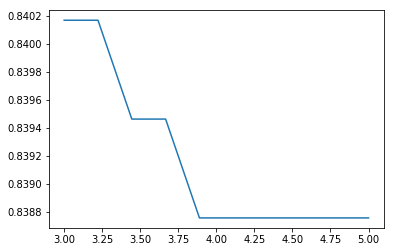

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(C_range,score);

## 追求平衡 SVM

In [94]:
import matplotlib.pyplot as plt
C_range = np.linspace(0.01,20,20)
recallall = []
aucall = []
scoreall = []
for C in C_range:
    times = time()
    clf = SVC(kernel = "linear",C=C
                ,class_weight = "balanced").fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    recallall.append(recall)
    aucall.append(auc)
    scoreall.append(score)
    print("under C %f, testing accuracy is %f,recall is %f', auc is %f" %(C,score,recall,auc))
    print(time()-times)

under C 0.010000, testing accuracy is 0.789250,recall is 0.744262', auc is 0.852849
0.4947025775909424
under C 1.062105, testing accuracy is 0.782178,recall is 0.760656', auc is 0.851930
2.4655871391296387
under C 2.114211, testing accuracy is 0.782178,recall is 0.760656', auc is 0.852021
4.299535512924194
under C 3.166316, testing accuracy is 0.782178,recall is 0.760656', auc is 0.851998
5.408902883529663
under C 4.218421, testing accuracy is 0.781471,recall is 0.757377', auc is 0.852036
6.000705242156982
under C 5.270526, testing accuracy is 0.783593,recall is 0.760656', auc is 0.852033
8.436365365982056
under C 6.322632, testing accuracy is 0.783593,recall is 0.760656', auc is 0.851977
9.381295204162598
under C 7.374737, testing accuracy is 0.783593,recall is 0.760656', auc is 0.851965
10.70728325843811
under C 8.426842, testing accuracy is 0.783593,recall is 0.760656', auc is 0.852030
10.996073961257935
under C 9.478947, testing accuracy is 0.782885,recall is 0.760656', auc is 0.85

0.8528492660645389 0.01


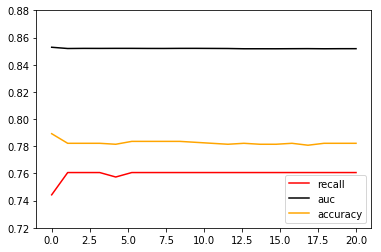

In [95]:
print(max(aucall),C_range[aucall.index(max(aucall))])
plt.figure()
plt.plot(C_range,recallall,c="red",label="recall")
plt.plot(C_range,aucall,c="black",label="auc")
plt.plot(C_range,scoreall,c="orange",label="accuracy")
plt.legend(loc=4)
plt.ylim([0.72,0.88])
plt.show()

In [96]:
times = time()
clf = SVC(kernel = "linear",C=1.0621052631578947
            ,class_weight = "balanced"
            ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f,recall is %f', auc is %f" % (score,recall,auc))
print(time()-times)

testing accuracy 0.782178,recall is 0.760656', auc is 0.851930
2.1529619693756104


### 调整ROC曲线阈值

In [103]:
from sklearn.metrics import roc_curve as ROC
import matplotlib.pyplot as plt
FPR, Recall, thresholds = ROC(Ytest,clf.decision_function(Xtest),pos_label=1)
area = roc_auc_score(Ytest,clf.decision_function(Xtest))

In [104]:
FPR

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.01713255e-04,
       9.01713255e-04, 1.80342651e-03, 1.80342651e-03, 2.70513977e-03,
       2.70513977e-03, 3.60685302e-03, 3.60685302e-03, 5.41027953e-03,
       5.41027953e-03, 7.21370604e-03, 7.21370604e-03, 8.11541930e-03,
       8.11541930e-03, 9.91884581e-03, 9.91884581e-03, 1.17222723e-02,
       1.17222723e-02, 1.26239856e-02, 1.26239856e-02, 1.35256988e-02,
       1.35256988e-02, 1.53291253e-02, 1.53291253e-02, 1.62308386e-02,
       1.62308386e-02, 1.71325518e-02, 1.71325518e-02, 1.80342651e-02,
       1.80342651e-02, 1.98376916e-02, 1.98376916e-02, 2.16411181e-02,
       2.16411181e-02, 2.25428314e-02, 2.25428314e-02, 2.34445446e-02,
       2.34445446e-02, 2.43462579e-02, 2.43462579e-02, 2.52479711e-02,
       2.52479711e-02, 3.06582507e-02, 3.06582507e-02, 3.33633904e-02,
       3.33633904e-02, 3.42651037e-02, 3.42651037e-02, 3.51668170e-02,
       3.51668170e-02, 3.69702435e-02, 3.69702435e-02, 3.78719567e-02,
      

In [105]:
Recall

array([0.        , 0.00327869, 0.05245902, 0.05245902, 0.14754098,
       0.14754098, 0.15737705, 0.15737705, 0.17377049, 0.17377049,
       0.18688525, 0.18688525, 0.20983607, 0.20983607, 0.21639344,
       0.21639344, 0.22295082, 0.22295082, 0.25245902, 0.25245902,
       0.27213115, 0.27213115, 0.27868852, 0.27868852, 0.28196721,
       0.28196721, 0.28852459, 0.28852459, 0.29180328, 0.29180328,
       0.31147541, 0.31147541, 0.3147541 , 0.3147541 , 0.32459016,
       0.32459016, 0.33114754, 0.33114754, 0.3442623 , 0.3442623 ,
       0.35081967, 0.35081967, 0.36393443, 0.36393443, 0.3704918 ,
       0.3704918 , 0.37377049, 0.37377049, 0.38032787, 0.38032787,
       0.38360656, 0.38360656, 0.38688525, 0.38688525, 0.39344262,
       0.39344262, 0.39672131, 0.39672131, 0.4       , 0.4       ,
       0.40327869, 0.40327869, 0.40983607, 0.40983607, 0.41311475,
       0.41311475, 0.41639344, 0.41639344, 0.41967213, 0.41967213,
       0.43278689, 0.43278689, 0.43934426, 0.43934426, 0.44262

In [106]:
thresholds

array([ 5.31396196e+00,  4.31396196e+00,  3.12781815e+00,  3.07921635e+00,
        2.35973432e+00,  2.35645402e+00,  2.32132132e+00,  2.30909158e+00,
        2.17837126e+00,  2.17436200e+00,  2.12606016e+00,  2.11356791e+00,
        1.98440854e+00,  1.95588465e+00,  1.89987563e+00,  1.89674169e+00,
        1.87105319e+00,  1.86767913e+00,  1.75803949e+00,  1.73146669e+00,
        1.66321373e+00,  1.66136438e+00,  1.65094516e+00,  1.64294413e+00,
        1.63337234e+00,  1.62780556e+00,  1.60071681e+00,  1.59794802e+00,
        1.59479694e+00,  1.58647548e+00,  1.51827100e+00,  1.51609845e+00,
        1.50789973e+00,  1.50132357e+00,  1.48214086e+00,  1.47398507e+00,
        1.44809500e+00,  1.39120201e+00,  1.37125649e+00,  1.36973238e+00,
        1.35907282e+00,  1.34922997e+00,  1.32108135e+00,  1.31804921e+00,
        1.29953519e+00,  1.26613705e+00,  1.26220501e+00,  1.24298878e+00,
        1.23595956e+00,  1.22817606e+00,  1.22213929e+00,  1.21912547e+00,
        1.21848037e+00,  

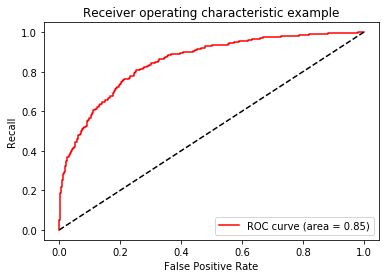

In [107]:
plt.figure()
plt.plot(FPR, Recall, color='red',
            label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [108]:
(Recall - FPR).tolist().index(max(Recall - FPR))

220

In [109]:
#寻找最佳阈值
maxindex = (Recall - FPR).tolist().index(max(Recall - FPR))

In [110]:
thresholds[maxindex]

-0.18410038776977766

In [111]:
from sklearn.metrics import accuracy_score as AC
times = time()
clf = SVC(kernel = "linear",C=1.0621052631578947
            ,class_weight = "balanced"
            ).fit(Xtrain, Ytrain)

In [112]:
prob = pd.DataFrame(clf.decision_function(Xtest))

In [113]:
prob

,0
0,-1.198372
1,2.023059
2,0.134677
3,0.063833
4,-1.683073
5,1.758039
6,-1.194374
7,1.586475
8,-1.949306
9,0.224720


In [114]:
prob.loc[prob.iloc[:,0] >= thresholds[maxindex],"y_pred"]=1
prob.loc[prob.iloc[:,0] < thresholds[maxindex],"y_pred"]=0

In [115]:
prob

,0,y_pred
0,-1.198372,0.0
1,2.023059,1.0
2,0.134677,1.0
3,0.063833,1.0
4,-1.683073,0.0
5,1.758039,1.0
6,-1.194374,0.0
7,1.586475,1.0
8,-1.949306,0.0
9,0.224720,1.0


In [116]:
#检查模型本身的准确度
score = AC(Ytest,prob.loc[:,"y_pred"].values)
score

0.7602545968882602

In [117]:
recall = recall_score(Ytest, prob.loc[:,"y_pred"])
recall

0.8065573770491803

In [118]:
times = time()
clf = SVC(kernel = "linear",C=1.0621052631578947
        ,class_weight = "balanced"
        ).fit(Xtrain, Ytrain)
prob = pd.DataFrame(clf.decision_function(Xtest))
prob.loc[prob.iloc[:,0] >= thresholds[maxindex],"y_pred"]=1
prob.loc[prob.iloc[:,0] < thresholds[maxindex],"y_pred"]=0
#检查模型本身的准确度
score = AC(Ytest,prob.loc[:,"y_pred"].values)
recall = recall_score(Ytest, prob.loc[:,"y_pred"])
print("testing accuracy %f,recall is %f" % (score,recall))
print(time()-times)

testing accuracy 0.760255,recall is 0.806557
2.311675548553467
